<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Евгений! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
К сожалению в твоя работа практически полностью совпадает с работой студентки первого потока.  Я сам проверял эту работу, поэтому уверен. Перед тем, как написать тебе еще раз сличил, вижу что отличия самые небольшие - гдето заменены имена перменных, где-то вместо обычной функции используется лямбда.  Но т.к. сам подход диаметрально отличается от того, что рекомендован авторами проекта, то все критичные шаги идентичны.
    
Прошу тебя перерабоать проект:    
    
- EDA - исследуем данные, особенно оценки экспертов и краудсорсинговые. Отвечаем на вопросы
 - Количество уникальных изображений в обучающем и тестовом наборах
 - Количество уникальных запросов  
 - Количество оценок в экспертном и краудсорсинговом наборах.
     
    
 - Прошу разобраться как свяаны между собой query_id и image b и построить очистку датасета от детских изображений на использовании этой взаимосвязи 
 
    
В качестве основного и единственного DL фрейморка прошу использовать pytorch
    
 - Векторизацию изображений прошу провести с помощью resnet18 (прекод). Но советую отрезать только один последний слой от модели, тогда размерность признаков будет 512.
 - Векторизацию текстов можешь оставить TF-IDF или BERT
    
    
По поводу подхода можешь повторить подгод Маргариты (если перепишешь его на torch) или используй подход, который рекомендован авторами проекта:
    
 - Объединяем признаки полученные из текстов и изображений в один длинный вектор.
 - Строим и обучаем модели, способные предсказывать меру соответствия по новому длинному вектору
 - Для итогового тестирования нужно построить функцию, которая принимает на вход текст, а выдает наиболее полходящее изображение из всех тестовых изображений + меру сходства.
    
    
Если ты не согласен с моим решением или хочешь обсудить границы переделки проекта - свяжись со мной через куратора.   

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Привет Дмитрий. Я полностью переделал проект, постарался учесть все твои рекомендации.
</div>

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

##  1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке: 

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке. 
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.


In [1]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install protobuf==3.20.* --user

Note: you may need to restart the kernel to use updated packages.


In [4]:
import math
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import re
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from PIL import Image
import random
from scipy.spatial import distance

import tensorflow as tf
import torchvision
import torch
import torch.nn as nn
import torchvision.models as models
from PIL import Image
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm, tqdm_notebook 
from torchvision import transforms
from sklearn.preprocessing import  StandardScaler 

Загружаем библиотеки

###  1.1 Тренировочные данные

Загрузим данные, и посмотрим на них. 

In [5]:
df_train = pd.read_csv('C:/Users/79099/Desktop/Image Search/to_upload/train_dataset.csv')
df_train.head(5)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


В загруженном файле train_dataset.csv собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>. Всего мы видим 3 столбца и 5822 строки, пропуски отсутствуют.

In [7]:
df_train.describe()

,image,query_id,query_text
count,5822,5822,5822
unique,1000,977,977
top,2061354254_faa5bd294b.jpg,2600867924_cd502fc911.jpg#2,"Two dogs , one brown and white and one black a..."
freq,10,34,34


Тренировочные данные содержат 1000 уникальных изображений и 977 уникальных идентефикаторов и столько же уникальных описаний к ним.

Поскольку у нас уникальных идентефикаторов "query_id" меньше чем уникальных изображений, то следовательно одному и тому же описанию может соответствовать несколько изображений.

Сделаем срез по одному описанию и посмотрим на результат.

In [8]:
df_id = df_train.query("query_id == '2549968784_39bfbe44f9.jpg#2'")

In [9]:
df_id

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


Получилось, что только одно название файла изображения соответствует названию "query_id"

###  1.2 Оценки соответствия

Посмотрим теперь на оценки соответствия этих изображений.

In [10]:
expert_annotations = pd.read_csv('C:/Users/79099/Desktop/Image Search/to_upload/ExpertAnnotations.tsv', sep='\t', header=None)
expert_annotations.head(5)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


Переименуем колонки.

In [11]:
expert_annotations.columns = ['image', 'query_id', 'ex_1', 'ex_2', 'ex_3']
expert_annotations.head(5)

,image,query_id,ex_1,ex_2,ex_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


Посчитаем среднюю оценку экспертов.

In [12]:
expert_annotations['mean_ex'] = expert_annotations[['ex_1', 'ex_2', 'ex_3']].mean(axis=1) 

Теперь посмотрим сводные результаты.

In [13]:
expert_annotations.describe()

,ex_1,ex_2,ex_3,mean_ex
count,5822.000000,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999,1.647658
std,0.787084,0.856222,0.904087,0.806205
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,1.333333
75%,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000


Средняя оценка экспертов не высока и составляет 1,64 и только в 25% случаев эксперты в среднем дают оценку 2 и выше.

Построим гистограмму.

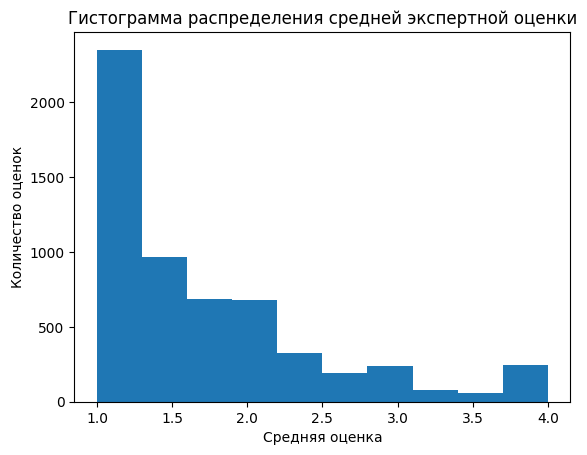

In [14]:
plt.hist(expert_annotations['mean_ex'], bins=10)
plt.title('Гистограмма распределения средней экспертной оценки')
plt.xlabel('Средняя оценка')
plt.ylabel('Количество оценок')
plt.show()

Гистограмма показывает правильность предварительных выводов, действительно преобладают низкие оценки.

Теперь посмотрим какие результаты мы имеем в по итогу краудсорсинговой оценке.

In [15]:
crowd_annotations = pd.read_csv('C:/Users/79099/Desktop/Image Search/to_upload/CrowdAnnotations.tsv', sep='\t', header=None)
crowd_annotations.head(5)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


In [16]:
crowd_annotations.columns = ['image', 'query_id', 'image_correct_percent', 'count_correspond', 'count_not_correspond']
crowd_annotations.head(5)

,image,query_id,image_correct_percent,count_correspond,count_not_correspond
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


В тыблице crowd_annotations содержатся следующие данные: 

- Имя файла изображения.
- Идентификатор описания.
- Доля людей, подтвердивших, что описание соответствует изображению.
- Количество человек, подтвердивших, что описание соответствует изображению.
- Количество человек, подтвердивших, что описание не соответствует изображению.

In [17]:
crowd_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  47830 non-null  object 
 1   query_id               47830 non-null  object 
 2   image_correct_percent  47830 non-null  float64
 3   count_correspond       47830 non-null  int64  
 4   count_not_correspond   47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


Данные разбиты на 5 столбцов и 47830 строк.

In [18]:
crowd_annotations.describe()

,image_correct_percent,count_correspond,count_not_correspond
count,47830.000000,47830.000000,47830.000000
mean,0.068786,0.208488,2.820155
std,0.207532,0.628898,0.656676
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,3.000000
75%,0.000000,0.000000,3.000000
max,1.000000,5.000000,6.000000


Как мы видим в среднем около 7% подтвердили соответствие изображения описанию.  

Построим гистограмму.

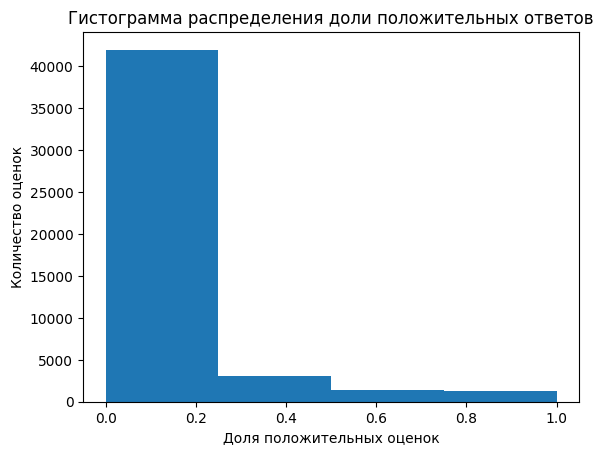

In [19]:
plt.hist(crowd_annotations['image_correct_percent'], bins=4)
plt.title('Гистограмма распределения доли положительных ответов')
plt.xlabel('Доля положительных оценок')
plt.ylabel('Количество оценок')
plt.show()

Картина примерно похожа на то, что мы видели на гистограмме оценок экспертов.

Теперь попробуем выявить общую закономерность, для этого сначала объеденим таблицы "expert_annotations" и "crowd_annotations" по столбцам "image" и "query_id" способом "left" 

In [20]:
final_annotations = pd.merge(expert_annotations, crowd_annotations,
                     on=['image', 'query_id'], how='left')

In [21]:
final_annotations.head(5)

,image,query_id,ex_1,ex_2,ex_3,mean_ex,image_correct_percent,count_correspond,count_not_correspond
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.000000,0.0,0.0,3.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.333333,0.0,0.0,3.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1.333333,NaN,NaN,NaN
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,1.666667,NaN,NaN,NaN
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1.333333,NaN,NaN,NaN


In [22]:
final_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  5822 non-null   object 
 1   query_id               5822 non-null   object 
 2   ex_1                   5822 non-null   int64  
 3   ex_2                   5822 non-null   int64  
 4   ex_3                   5822 non-null   int64  
 5   mean_ex                5822 non-null   float64
 6   image_correct_percent  2329 non-null   float64
 7   count_correspond       2329 non-null   float64
 8   count_not_correspond   2329 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 454.8+ KB


Видим, что после объединения таблиц появились пропуски.

Посмотрим есть ли корреляция между столбцами "mean_ex" и "image_correct_percent" там, где данные есть, потом подумаем каким образом заполнить пропуски и возможно ли это.  

Сначала создадим копию "final_annotations" и удалим пропуски.

In [23]:
final_annotations_dp = final_annotations.copy()
final_annotations_dp.dropna(subset=['image_correct_percent'], inplace=True)
final_annotations_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 5821
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  2329 non-null   object 
 1   query_id               2329 non-null   object 
 2   ex_1                   2329 non-null   int64  
 3   ex_2                   2329 non-null   int64  
 4   ex_3                   2329 non-null   int64  
 5   mean_ex                2329 non-null   float64
 6   image_correct_percent  2329 non-null   float64
 7   count_correspond       2329 non-null   float64
 8   count_not_correspond   2329 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 182.0+ KB


Теперь посмотрим коррелируют ли данные в столбцах  "mean_ex" и "image_correct_percent". 

In [24]:
print('Корреляция между средней экспертной оценкой и оценкой кроудфаиндинга',final_annotations_dp['mean_ex'].corr(final_annotations_dp['image_correct_percent']))

Корреляция между средней экспертной оценкой и оценкой кроудфаиндинга 0.7907823667086602


Значение получилось достаточно близким к единице, следовательно корреляция высокая.

Средних оценок экспертов не много и они лежат в диапазоне от 1 до 4. 

Удалим "лишние" столбцы, а потом сгруппируем данные по "mean_ex" с агрегирующей функцией mean(). 

In [25]:
final_annotations_dp_group = final_annotations_dp.drop(['image', 'query_id', 'ex_1', 'ex_2', 'ex_3',
                                                        'count_correspond','count_not_correspond'], axis=1) 

In [26]:
final_annotations_dp_group = final_annotations_dp_group.groupby(by=['mean_ex']).mean().sort_values(by=['mean_ex']) 
final_annotations_dp_group

,image_correct_percent
mean_ex,
1.000000,0.002070
1.333333,0.003333
1.666667,0.017500
2.000000,0.036651
2.333333,0.102014
2.666667,0.205521
3.000000,0.317481
3.333333,0.578169
3.666667,0.767857


Таким образом мы нашли каким средним экспертным оценкам соответствуют средние оценки краудсорсинга.

Теперь вернёмся к таблице "final_annotations".

Сначало удалим лишние столбцы.

In [27]:
final_annotations = final_annotations.drop(['ex_1', 'ex_2', 'ex_3', 'count_correspond','count_not_correspond'], axis=1) 

In [28]:
final_annotations.head(5)

,image,query_id,mean_ex,image_correct_percent
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.000000,0.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.333333,0.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.333333,NaN
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1.666667,NaN
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.333333,NaN


Заполним пропуски по значениям из полученной ранее таблицы "final_annotations_dp_group"

In [29]:
percent = list(final_annotations_dp_group['image_correct_percent'])
mean_ex = list(final_annotations_dp_group.index)

In [30]:
for k in range(len(final_annotations['image_correct_percent'])):
    if math.isnan(final_annotations['image_correct_percent'][k]):
        for p in range(len(mean_ex)):
            if final_annotations.loc[k,('mean_ex')] == mean_ex[p]:
                final_annotations.loc[k, ('image_correct_percent')] = percent[p]
                
        

In [31]:
final_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  5822 non-null   object 
 1   query_id               5822 non-null   object 
 2   mean_ex                5822 non-null   float64
 3   image_correct_percent  5822 non-null   float64
dtypes: float64(2), object(2)
memory usage: 356.5+ KB


Пропуски заполнены

Отмасштабируем данные по экспертным оценкам, чтобы привести их к значениям от 0 до 1, минимальное знечение средней экспертной оценки 1 максимальное 4.

In [32]:
final_annotations['mean_ex'] = (final_annotations['mean_ex'] - 1)/(4-1)

Теперь получим итоговую оценку, для этого сложим оценку эксперта с коэфициентом 0.6 и оценку краудфандинга с коэфициентом 0.4

In [33]:
final_annotations['estimation'] = final_annotations['mean_ex']*0.6 + final_annotations['image_correct_percent']*0.4

###  1.3 Тестовые данные

In [34]:
test_queries = pd.read_csv('C:/Users/79099/Desktop/Image Search/to_upload/test_queries.csv', sep='|', index_col=0)
test_queries.head(5)

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


In [35]:
test_queries.describe()

,query_id,query_text,image
count,500,500,500
unique,500,500,100
top,2670637584_d96efb8afa.jpg#4,Three riders wearing black jerseys jump their ...,404850242_3a55a4c874.jpg
freq,1,1,5


Тестовые данные содержат 100 уникальных изображений и 500 уникальных описаний к ним.

###  1.4 Вывод

Были проведены: первичное знакомство с данными и статистический анализ. В результате данного анализа были выявлены:

- Тренировочные данные содержат 1000 уникальных изображений и 977 уникальных идентефикаторов и столько же уникальных описаний к ним.

- Прямо пропорциональная зависимость между экспертными оценками и оценками краудсорсинга. После чего была расчитана единая оценка на основе вышеуказанных оценок.

- Тестовые данные содержат 100 уникальных изображений и 500 уникальных описаний к ним.

- Эксперты сделали 5822 оценки

- В результате краудсорсинга получено 47830 оценок.


## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

This image is unavailable in your country in compliance with local laws

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Для того чтобы это сделать, составим список слов, которые могут характеризовать детей, проверим наличие 

Для удобства в дальнейшем, объеденим тренировочные данные и полученую нами таблицу "final_annotations", после чего удалим лишние столбцы с оценками, которые нам больше не нужны.

In [36]:
df_training = pd.merge(df_train, final_annotations,
                     on=['image', 'query_id'], how='left') 

In [37]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  5822 non-null   object 
 1   query_id               5822 non-null   object 
 2   query_text             5822 non-null   object 
 3   mean_ex                5822 non-null   float64
 4   image_correct_percent  5822 non-null   float64
 5   estimation             5822 non-null   float64
dtypes: float64(3), object(3)
memory usage: 318.4+ KB


In [38]:
df_training = df_training.drop(['mean_ex', 'image_correct_percent'], axis=1)

In [39]:
df_training.head(5)

,image,query_id,query_text,estimation
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000828
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.133333
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000828


Приведём тексты в столбце "query_text" к нижнему регистру

In [40]:
df_training['query_text'] = df_training['query_text'].str.lower()

Сначало очистим текст и сделаем лемматизацию.

Очистка текста.

In [41]:
def clear_text(text):
   
    r_text = re.sub(r'[^a-zA-Z]', ' ', text)
    text_list = r_text.split()
    clear_text = " ".join(text_list)
    return clear_text

In [42]:
df_training['clean_text'] = df_training['query_text'].apply(clear_text)

Лемматизация текста

In [43]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\79099\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\79099\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\79099\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [45]:
def lemmatize_words(text):
    word_list = nltk.word_tokenize(text)
    
    words = [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in word_list]
    return  ' '.join(words)


In [46]:
df_training['lemm_text'] = df_training['clean_text'].apply(lemmatize_words)

In [47]:
df_training = df_training.drop(['clean_text'], axis=1)

Теперь создадим список слов, фразы с которыми надо исключить.

In [48]:
forbidden_words = ['baby', 'boy', 
                    'babies', 'adolescent',  
                    'child',  'children', 'girl', 
                    'kid', 'kids', 'infant', 'teenager',  
                    'juvenile', 'minor', 'stripling'  
                    'minors', 'youth', 'youths', 
                    'teen', 'teens', 'teena',
                    'teeny', 'teener']

In [49]:
def forbidden_phrases(text):
    for w in text.split():
        if w in forbidden_words:
            return 1

    return 0

In [50]:
df_training['forbidden_phrases'] = df_training['lemm_text'].apply(forbidden_phrases)

Сделаем срез данных

In [51]:
df_tr = df_training.query("forbidden_phrases == 0")

In [52]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4274 entries, 22 to 5821
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              4274 non-null   object 
 1   query_id           4274 non-null   object 
 2   query_text         4274 non-null   object 
 3   estimation         4274 non-null   float64
 4   lemm_text          4274 non-null   object 
 5   forbidden_phrases  4274 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 233.7+ KB


In [53]:
df_tr = df_tr.drop(['forbidden_phrases'], axis=1)

###  2.1 Вывод

Была проведена проверка описаний картинки на наличие слов, которые могут быть связаны с детьми, по списку "forbidden_words", который был составлен выше. В результате проверки осталось 4274 записи. Таким образом было отсеено порядка 26% контента.

## 3. Векторизация изображений

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Пробовал изначально такой код, но размер выдаваемого вектора был не 512, в итоге применил другое решение.
            
</div>

    modules = list(resnet.children())[:-1]
    resnet = nn.Sequential(*modules) 
    resnet.eval()
    norm = transforms.Normalize(
      mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
    ])




In [55]:
model_res_18 = models.resnet18(pretrained=True)

In [56]:
layer = model_res_18._modules.get('avgpool')

Преведение модели в режим оценки

In [57]:
model_res_18.eval()
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Создадим функцию для векторизации изображения

In [58]:
def im_vector(name):
    image = Image.open("C:/Users/79099/Desktop/Image Search/to_upload/train_images/"+name).convert('RGB') 
    t_img = transforms(image)
    my_embedding = torch.zeros(512)

    def copy_data(m, i, o):
        my_embedding.copy_(o.flatten())               

    h = layer.register_forward_hook(copy_data)

    with torch.no_grad():                              
        model_res_18(t_img.unsqueeze(0))                     
 
    h.remove()

    return my_embedding

In [59]:
df_tr = df_tr.reset_index()

In [60]:
df_tr['im_vector'] = df_tr['image'].apply(im_vector)

In [61]:
image_list = list(df_tr['im_vector'])

In [62]:
image_tensor = torch.stack(image_list)

In [63]:
image_tensor.shape

torch.Size([4274, 512])

###  3.1 Вывод

Преобразовали изображения в векторы с помощью архитектуры ResNet-18. Размерность вектора 512.

## 4. Векторизация текстов

Используем для векторизации модель TF-IDF.

In [64]:
nltk.download('stopwords')
stop_words = set(nltk_stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79099\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
tf_idf = TfidfVectorizer(stop_words=stop_words)

In [66]:
corpus = df_tr['lemm_text'].values

In [67]:
text_vector = tf_idf.fit_transform(corpus)

###  4.1 Вывод

Преобразовали тексты в вектора методом TF-IDF

## 5. Объединение векторов

Подготовим данные для обучения: объединим векторы изображений и векторы текстов.

In [68]:
text_tensor = torch.tensor(text_vector.todense())

Проведём объединение векторов.

In [69]:
concated_tensor = torch.cat((image_tensor, text_tensor), axis=1)

In [70]:
concated_tensor.shape

torch.Size([4274, 1462])

###  5.1 Вывод

Объеденили векторы текста и изображений, итоговый размер (4274, 1462)

## 6. Обучение модели предсказания соответствия

Разобъём данные на тренировочную и валидационную выборка классом GroupShuffleSplit 

In [71]:
target = df_tr['estimation']

In [72]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)

In [73]:
train_indices, valid_indices = next(gss.split(X=concated_tensor, y=target, groups=df_tr['image']))
features_train, features_valid = concated_tensor[train_indices], concated_tensor[valid_indices]
target_train, target_valid = target[train_indices], target[valid_indices]

In [74]:
features_train.shape

torch.Size([3018, 1462])

In [75]:
target_train.shape

(3018,)

### 6.1 Линейная регрессия

In [76]:
X_train = torch.FloatTensor(features_train.float())
X_valid = torch.FloatTensor(features_valid.float())
y_train = torch.FloatTensor(target_train.values)
y_valid = torch.FloatTensor(target_valid.values)

In [77]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(features_train.shape[1], 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
Linear_model = LinearRegression()

In [78]:
criterion = torch.nn.MSELoss()

In [79]:
optimizer = torch.optim.SGD(Linear_model.parameters(), lr=0.001)

In [80]:
for epoch in range(10):
    Linear_model.train()
    optimizer.zero_grad()
    pred = Linear_model(X_train)
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

C:\Users\79099\anaconda3\envs\ds1_practicum_env\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([3018])) that is different to the input size (torch.Size([3018, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 0.19133582711219788
epoch 1, loss 0.1398962289094925
epoch 2, loss 0.13873426616191864
epoch 3, loss 0.1376800239086151
epoch 4, loss 0.13665632903575897
epoch 5, loss 0.13566167652606964
epoch 6, loss 0.13469475507736206
epoch 7, loss 0.13375434279441833
epoch 8, loss 0.13283929228782654
epoch 9, loss 0.1319485455751419


In [81]:
valid_preds = Linear_model(X_valid) 

In [82]:
valid_loss = criterion(valid_preds, y_valid)
valid_loss

C:\Users\79099\anaconda3\envs\ds1_practicum_env\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1256])) that is different to the input size (torch.Size([1256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.1138, grad_fn=<MseLossBackward>)

### 6.2 Нейронная сеть

Создадим класс и функции для полчения предсказаний.

In [83]:
class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2,  n_out_neurons, p1):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.dp1 = nn.Dropout(p=p1)
        self.act1 = nn.Tanh()
        
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
        self.act2 = nn.Sigmoid()
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc3.weight, mode='fan_in', nonlinearity='relu')
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act2(x)
        
        x = self.fc3(x)

        
        return x

Функция для обучения нейросети.

In [84]:
def network_training(net, num_epochs:int, X_train, y_train, X_valid, y_valid, p1):
    

    best_MSE = 200
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-2)
    loss = nn.MSELoss()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = net.forward(X_train).flatten()
        MSE_loss = loss(preds, y_train)
        MSE_loss.backward()
        optimizer.step()
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            net.eval()
            preds = net.forward(X_valid)
            MSE = loss(preds, y_valid)
            if best_MSE > MSE:
                best_MSE = MSE
                best_epoch = epoch
                best_model = net
            optimizer.step()
    return (best_MSE.tolist(), p1, best_model)

In [85]:
result_list = []
p_1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n0 = features_train.shape[1]
n1 = 426
n2 = 247
nout = 1
num_epochs = 10

In [86]:
for p1 in p_1: 
    net = Net(n0, n1,n2,nout, p1)
    b = network_training(net, num_epochs, X_train, y_train, X_valid, y_valid, p1)
    result_list.append(b)
    print(p1)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [87]:
result_df = pd.DataFrame(result_list).loc[::,:2]
result_df=result_df.rename(columns={0:'MSE_valid',1:'p1',2:'best_model'})
result_df.sort_values('MSE_valid').head()

,MSE_valid,p1,best_model
3,0.096040,0.4,"Net(\n (fc1): Linear(in_features=1462, out_fe..."
1,0.182515,0.2,"Net(\n (fc1): Linear(in_features=1462, out_fe..."
4,0.196397,0.5,"Net(\n (fc1): Linear(in_features=1462, out_fe..."
8,0.514279,0.9,"Net(\n (fc1): Linear(in_features=1462, out_fe..."
7,0.556719,0.8,"Net(\n (fc1): Linear(in_features=1462, out_fe..."


In [88]:
best_m = result_df.loc[1,'best_model']
best_m

Net(
  (fc1): Linear(in_features=1462, out_features=426, bias=True)
  (dp1): Dropout(p=0.2, inplace=False)
  (act1): Tanh()
  (fc2): Linear(in_features=426, out_features=247, bias=True)
  (bn2): BatchNorm1d(247, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=247, out_features=1, bias=True)
)

### 6.3 Вывод

Обучили 2 модели: Линейную регрессию и нейронную сеть. В качестве метрики использовали MSE.

- Ленийная регрессия показала MSE на валидационной выборке 0.11
- Нейронная сеть соответственно 0.13

Линейная регрессия показала результат лучше.

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

Создадим список из 10 случайных чисел, которые будут соответствовать индексу тестовой выбрки.

Сначало переведём изображения в вектора.

In [89]:
def im_vector_test(name):
    image = Image.open('C:/Users/79099/Desktop/Image Search/to_upload/test_images/'+name).convert('RGB') 
    t1_img = transforms(image)
    my_embedding1 = torch.zeros(512)

    def copy_data(m, i, o):
        my_embedding1.copy_(o.flatten())               

    h = layer.register_forward_hook(copy_data)

    with torch.no_grad():                              
        model_res_18(t1_img.unsqueeze(0))                     
 
    h.remove()

    return my_embedding1

In [90]:
test_queries['im_vector'] = test_queries['image'].apply(im_vector_test)

In [91]:
image_list_test = list(test_queries['im_vector'])

In [92]:
image_tensor_test = torch.stack(image_list_test)

Теперь переведём в вектора описания

In [93]:
test_queries['clean_text'] = test_queries['query_text'].apply(clear_text)

In [94]:
test_queries['lemm_text'] = test_queries['clean_text'].apply(lemmatize_words)

In [95]:
corpus_test = test_queries['lemm_text'].values

In [96]:
text_vector_test = tf_idf.transform(corpus_test)

In [97]:
text_tensor_test = torch.tensor(text_vector_test.todense())

Объеденим полученые вектора

In [98]:
concated_tensor_test = torch.cat((image_tensor_test, text_tensor_test), axis=1)

Теперь получим предсказания на тестовой выборке

In [99]:
X_test = torch.FloatTensor(concated_tensor_test.float())

In [100]:
test_preds = Linear_model(X_test) 

### 7.1 Функция для тестирования

Теперь создадим функцию, которая будет на входе получать текст, а на выходе будет выдавать изображение и прогнозную оценку, что покажет близость текста и изображения.

In [101]:
def test(text):
    tx = text 
    text = text
    text = text.lower()
    if any(s in text for s in forbidden_words):
        print('This image is unavailable in your country in compliance with local laws')   
    else:
        text = clear_text(text)
        text = lemmatize_words(text)
        corpus_ts = []
        corpus_ts.append(text)
        tf_text = tf_idf.transform(corpus_ts)
        tf_text_vect = torch.tensor(tf_text.todense())
        dist = []
        for u in range(len(text_tensor_test)):
            di = torch.dist(tf_text_vect, text_tensor_test[u], 1)
            dist.append(di)
        index_min = np.argmin(dist)
        name = test_queries.loc[index_min,('image')]
        image = Image.open('C:/Users/79099/Desktop/Image Search/to_upload/test_images/'+name)
        plt.imshow(np.array(image))
        plt.title(tx)
        plt.show()
        print('Предполагаемая оценка эксперта', test_preds[index_min].detach().numpy())

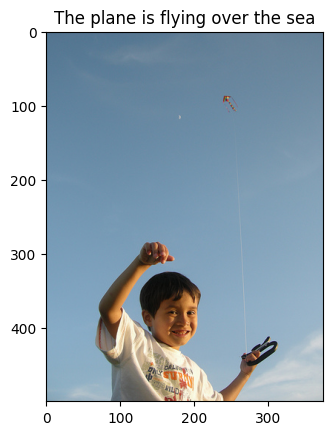

Предполагаемая оценка эксперта [0.29085952]


In [102]:
test('The plane is flying over the sea')

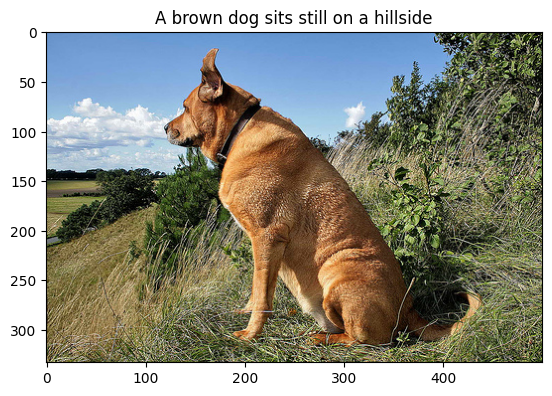

Предполагаемая оценка эксперта [0.49249026]


In [103]:
test('A brown dog sits still on a hillside')

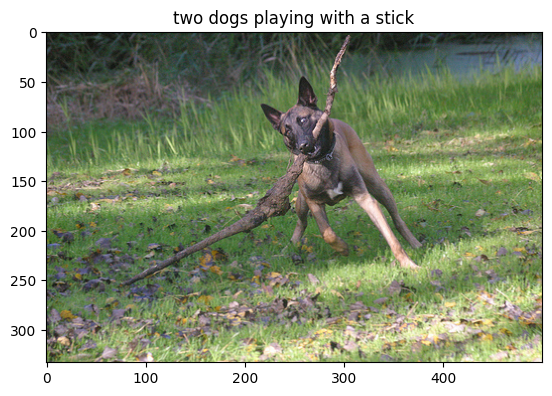

Предполагаемая оценка эксперта [0.5807526]


In [104]:
test('two dogs playing with a stick')

In [105]:
test('Two babies are squirting water guns at each other')

This image is unavailable in your country in compliance with local laws


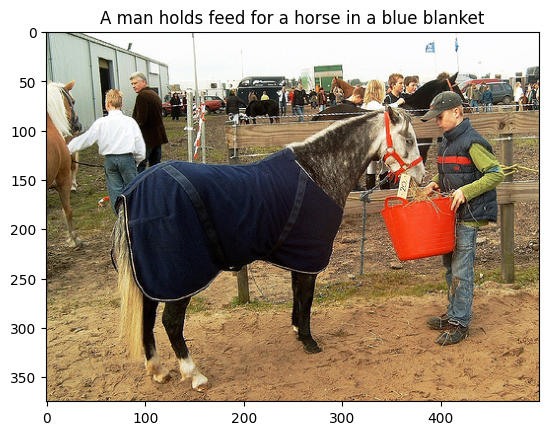

Предполагаемая оценка эксперта [0.5526498]


In [106]:
test('A man holds feed for a horse in a blue blanket')

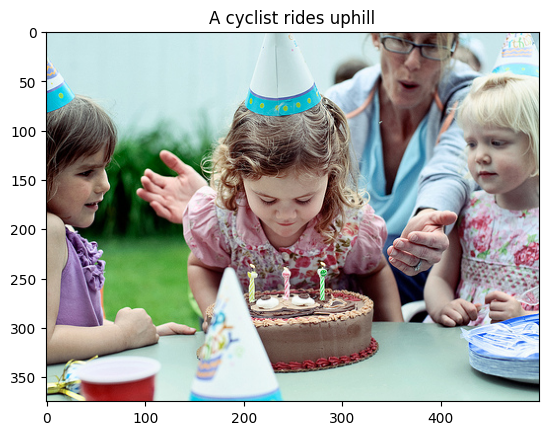

Предполагаемая оценка эксперта [-0.31857213]


In [107]:
test('A cyclist rides uphill')

In [108]:
test('Two boys spraying each other with water')

This image is unavailable in your country in compliance with local laws


In [109]:
test('A group of teenagers near Simpsons characters')

This image is unavailable in your country in compliance with local laws


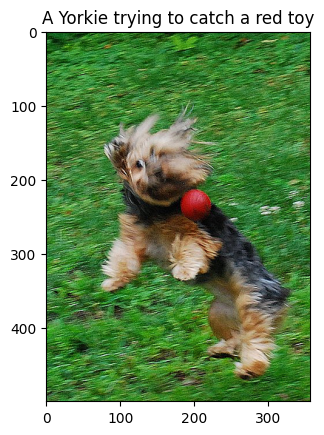

Предполагаемая оценка эксперта [-0.00874459]


In [110]:
test('A Yorkie trying to catch a red toy')

In [111]:
test('two girls walking in the street')

This image is unavailable in your country in compliance with local laws


## 7. Вывод

В процессе работы от нас требовалось разработать демонстрационную версию поиска изображений по запросу.
В качестве исходных данных у нас имелись: изображения, описания к ним и экспертные оценки на соответствие изображения описанию.
В начале был проведён исследовательский анализ данных, затем отобраны данные для обучения, после чего были обучены модели линейной регрессии и полносвязная нейросеть.

По результатам проверки на валидационной выборке линейная регрессия показала чуть лучше результат и при этом обучилась быстрее.
Тестирование данной модели показало её работоспособность, кроме того была решена задача по исключению "проблемного" контента (фотографии детей).

В целом модель достаточно неплохо подбирает картинки под описания но при этом сходство оценивает не достаточно хорошо.
Были опробованы как случайные описания, так и описания имеющиеся в тестовой базе.
Но тестовая база относительно не большая и по всей видимости там просто нет изображений и описаний к ним на все тематики.